# Exploratory Data Analysis Project Using Python

To explore the nuances of EDA for the first time, I selected working with some COVID-19 data sets.

This project was guided by [this](https://nbviewer.jupyter.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb) tutorial.

Data for this was downloaded from Kaggle [here](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)

## 1. Importing Libraries

These are the libraries we'll be using for this project.

`Pandas`, `Numpy`, `Seaborn`, and `matplotlib`.

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns       #for visualization
import matplotlib.pyplot as plt     #for visualization
#this command allows us to see ploted data directly in the notebook, not ina separated window (%matplotlib)
%matplotlib inline
sns.set(color_codes=True)

---

## 2. Loading CSV File

In [99]:
data = pd.read_csv("country_wise.csv")
#use the comand .head() to display the number of rows in the sample you want
data.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


---

In [100]:
#the command .tail() will display the bottom of the file
data.tail(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
178,Uruguay,1202,35,951,216,10,1,3,2.91,79.12,3.68,1064,138,12.97,Americas
179,Uzbekistan,21209,121,11674,9414,678,5,569,0.57,55.04,1.04,17149,4060,23.67,Europe
180,Venezuela,15988,146,9959,5883,525,4,213,0.91,62.29,1.47,12334,3654,29.63,Americas
181,Vietnam,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,Western Pacific
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


---

## 3. Checking the types of data

In [101]:
data.dtypes #to check the type of data in your set, you can use this command

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

---

## 4. Dropping columns

As part of this study and to be more didactic, we'll eliminate some columns only with educational purpose.

In [102]:
data = data.drop(columns=['1 week change', '1 week % increase', 'Confirmed last week', 'WHO Region', 'Country/Region'])
# we can also drop cloumns by mentioning the axis=1 in the command, data = data.drop([col1, col,2, ...], axis=1)
data.head(5)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17
3,907,52,803,52,10,0,0,5.73,88.53,6.48
4,950,41,242,667,18,1,0,4.32,25.47,16.94


---

## 5. Rename columns comand

To rename a column and make it shorter or easier to understand, we can use the `.rename(columns={"name":"rename", ...}) command.

In this example let's rename the columns to make them more readable.

In [103]:
data = data.rename(columns={"Deaths / 100 Cases": "DeathPer100", "Recovered / 100 Cases": "Recovered/100" })
data.head(4)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DeathPer100,Recovered/100,Deaths / 100 Recovered
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17
3,907,52,803,52,10,0,0,5.73,88.53,6.48


---

## 6. Dropping duplicated rows

Part of the data cleaning in the EDA is removing duplicated data that could often damage the results or reports.

First, let's check how many rows we have (and columns) by using the shape command.

In [104]:
data.shape

(187, 10)

We can see it has few rows and columns.

Let's clean it to see if ther is any duplicate rows and if numbers will change.

In [105]:
duplicate_rows_data = data[data.duplicated()]
print("rows duplicated: ",duplicate_rows_data.shape) #.shape to show the result in rows, columns

rows duplicated:  (0, 10)


It did not find any duplicates, however, if we were to remove them, the commands are:

In [106]:
data.count() #to check how many rows we have in each column

Confirmed                 187
Deaths                    187
Recovered                 187
Active                    187
New cases                 187
New deaths                187
New recovered             187
DeathPer100               187
Recovered/100             187
Deaths / 100 Recovered    187
dtype: int64

In [107]:
data = data.drop_duplicates() #deleting duplicates command
data.head(5)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DeathPer100,Recovered/100,Deaths / 100 Recovered
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17
3,907,52,803,52,10,0,0,5.73,88.53,6.48
4,950,41,242,667,18,1,0,4.32,25.47,16.94


In [108]:
#let's count again
data.count()

Confirmed                 187
Deaths                    187
Recovered                 187
Active                    187
New cases                 187
New deaths                187
New recovered             187
DeathPer100               187
Recovered/100             187
Deaths / 100 Recovered    187
dtype: int64

As we can see, the duplicates were removing, leaving 93084 unique rows.

---

## 7. Dropping the missing or null values

Very simmilar to the last step, however, it will drop null or N/A. This is not the most indicated way when dealing with big data sets as people tent to replace missing that with other things like zeros, dots or other entries.

For educational purpouse, let's have a look at it.

In [109]:
print(data.isnull().sum())

Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
DeathPer100               0
Recovered/100             0
Deaths / 100 Recovered    0
dtype: int64


In this case, there are no null or N/A value.
If we had any, the command would be most similar to step 6.

Let's run it and check.

In [110]:
data = data.dropna()
data.count()

Confirmed                 187
Deaths                    187
Recovered                 187
Active                    187
New cases                 187
New deaths                187
New recovered             187
DeathPer100               187
Recovered/100             187
Deaths / 100 Recovered    187
dtype: int64

As the data did not have any null or N/A entries, nothing changed as we can see.

---

## 8. Detecting Outliers

An outlier (out of the curve) is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model.

It is a good practice to remove these values.

To do so, we'll use 2 techniques:Box Plot; and the IQR (interquartile range).

To visualize, we can often use box plot.

Read this for more on box plot and IQR [ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

#### Box Plot

It plots a range within a box in which determines regular and most repetitive entries and leaves outside the outliers.

<AxesSubplot: xlabel='Active'>

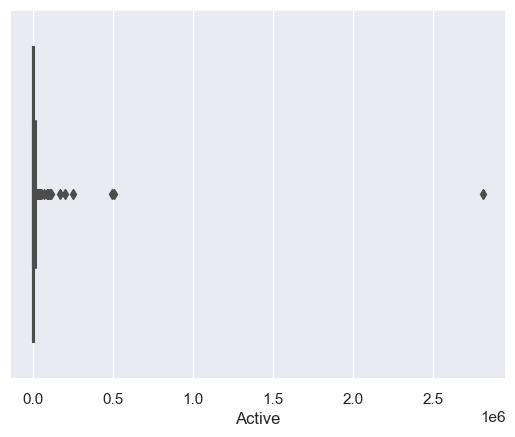

In [111]:
sns.boxplot(x=data['Active'])

<AxesSubplot: xlabel='DeathPer100'>

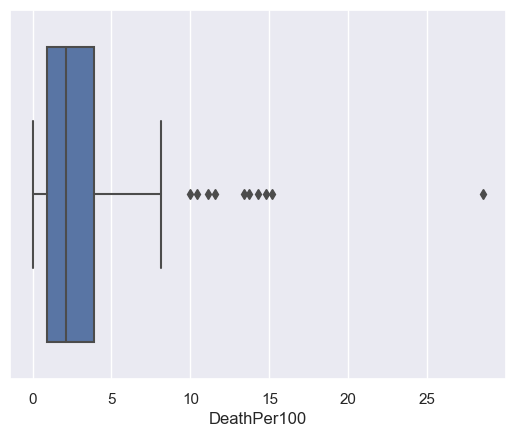

In [112]:
sns.boxplot(x=data['DeathPer100'])

#### Interquartile Range (IQR)

Wikipedia definition:
"The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers."

First we will calculate IQR:

In [113]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#Here we'll get the IQR for each column.

Confirmed                 39346.500
Deaths                      715.500
Recovered                 21979.500
Active                     9007.500
New cases                   415.500
New deaths                    6.000
New recovered               221.000
DeathPer100                   2.930
Recovered/100                38.115
Deaths / 100 Recovered        4.990
dtype: float64


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [114]:
print(((data < (Q1 - 1.5 * IQR))) | (data > (Q3 + 1.5 * IQR)))

     Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0        False   False      False   False      False       False   
1        False   False      False   False      False       False   
2        False   False      False   False      False       False   
3        False   False      False   False      False       False   
4        False   False      False   False      False       False   
..         ...     ...        ...     ...        ...         ...   
182      False   False      False   False      False       False   
183      False   False      False   False      False       False   
184      False   False      False   False      False       False   
185      False   False      False   False      False       False   
186      False   False      False   False      False       False   

     New recovered  DeathPer100  Recovered/100  Deaths / 100 Recovered  
0            False        False          False                   False  
1            False        False      

---

## 9. Different types of plots

9.1 Histogram
9.2 Heat Maps
9.3 Scatterplot

#### Histogram
It plots values agains dataframe frequency. In another words, it refers to the frequency of occurance of variables in an interval.

Text(0.5, 0, 'Price')

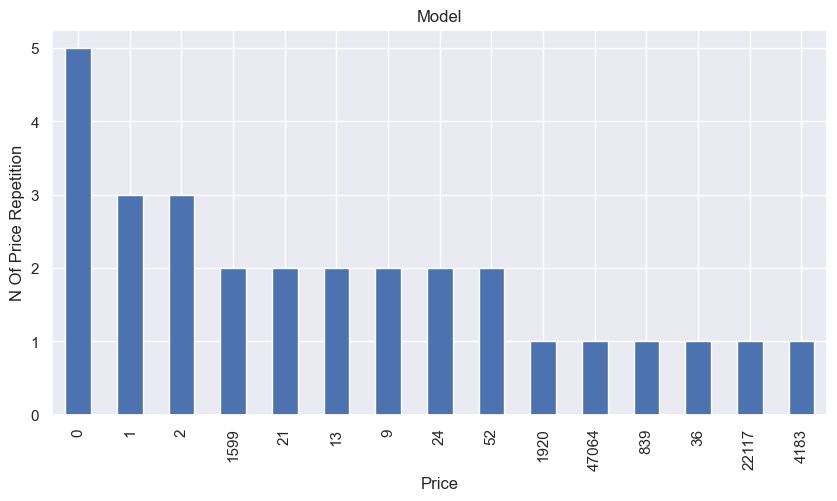

In [115]:
data.Active.value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.title("Model")
plt.ylabel('N Of Price Repetition')
plt.xlabel('Price')

#### Heat Maps

Heat Maps are a great way to identify dependent variables. To find relationship between the features, we plot the dataframe in heat maps.

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DeathPer100,Recovered/100,Deaths / 100 Recovered
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340
DeathPer100,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594
Recovered/100,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000


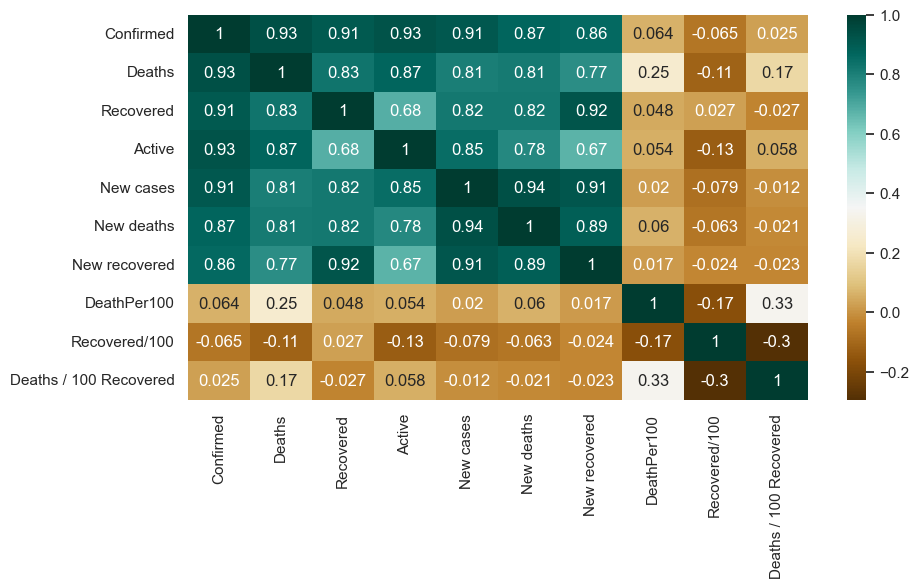

In [116]:
plt.figure(figsize=(10,5))
c=data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

As you can see, because all numbers are close to 1, it rounds up in the image, but the heat scale demonstrates where we can find it.

#### Scatterplot

This type of plot is generally used to identify correlation between variables.

Let's plot Highest Biding Price and Highest Asking Price.

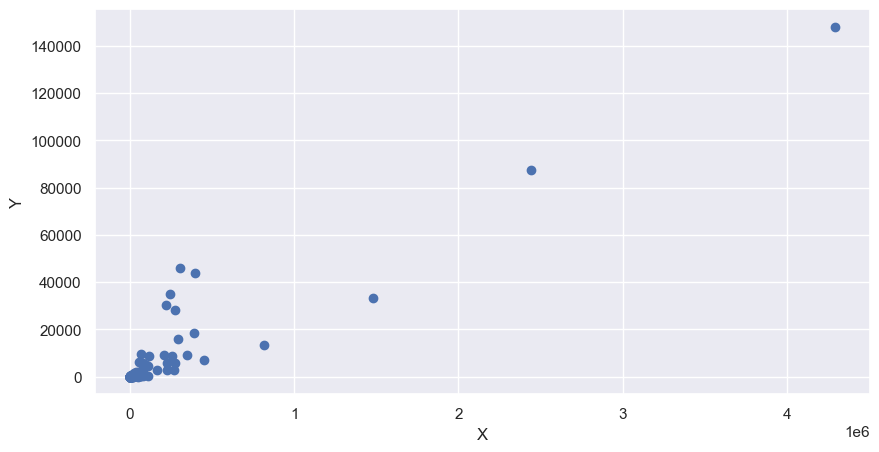

In [117]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data['Confirmed'], data['Deaths'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

---

These are some examples of EDA.